In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Algerian_forest_fires_cleaned.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [3]:
# Drop month, year and day columns for correlation analysis
df1 = df.drop(['month', 'day', 'year'], axis=1)
df1.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
## Encoding 'Classes' column
df1['Classes'] = np.where(df1['Classes'].str.contains('not fire'), 0, 1)
df1.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [5]:
## Independent and dependent variables
X = df1.drop('FWI', axis=1)
y = df1['FWI']
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [6]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((182, 11), (61, 11), (182,), (61,))

In [8]:
## Feature selection based on correlation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


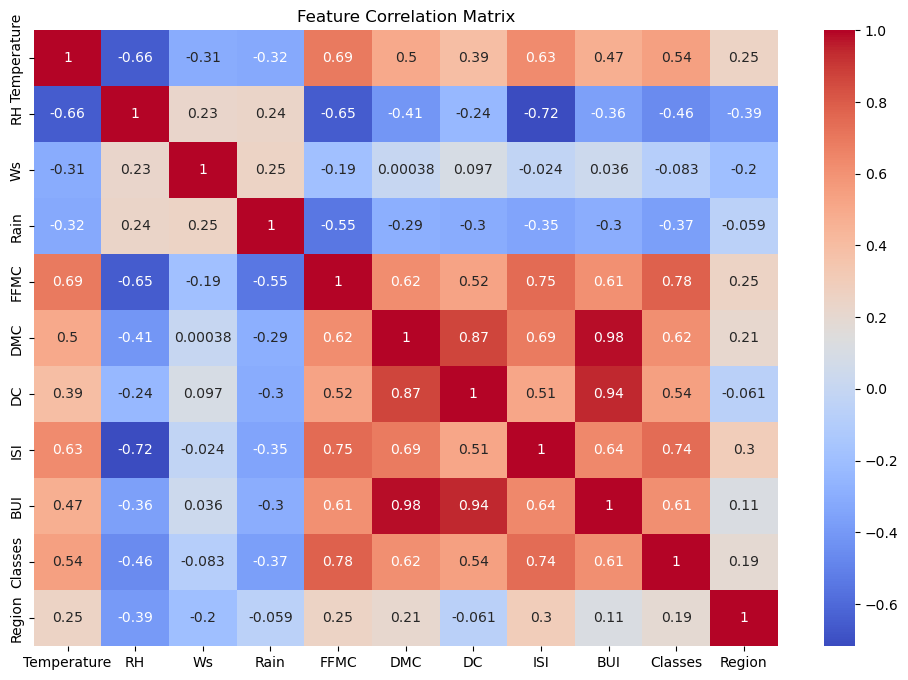

In [9]:
## check for multicollinearity
plt.figure(figsize=(12,8))
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

In [10]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr
#explanation of the function above
# This function identifies columns in the dataset that have a correlation higher than the specified threshold.
# It returns a set of column names that are highly correlated with other columns, which can be useful for feature selection to reduce multicollinearity.

In [11]:
cor_features = correlation(X_train, 0.85)

In [12]:
## drop feature when correlation is more than 0.85
X_train.drop(cor_features, axis=1, inplace=True)
X_test.drop(cor_features, axis=1, inplace=True)
# explanation of the above code
# This code removes the features identified as highly correlated (with correlation above 0.85) from both the training and testing datasets to reduce multicollinearity.
# why we do this
# Reducing multicollinearity helps improve the performance and interpretability of machine learning models by eliminating redundant information.

In [13]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

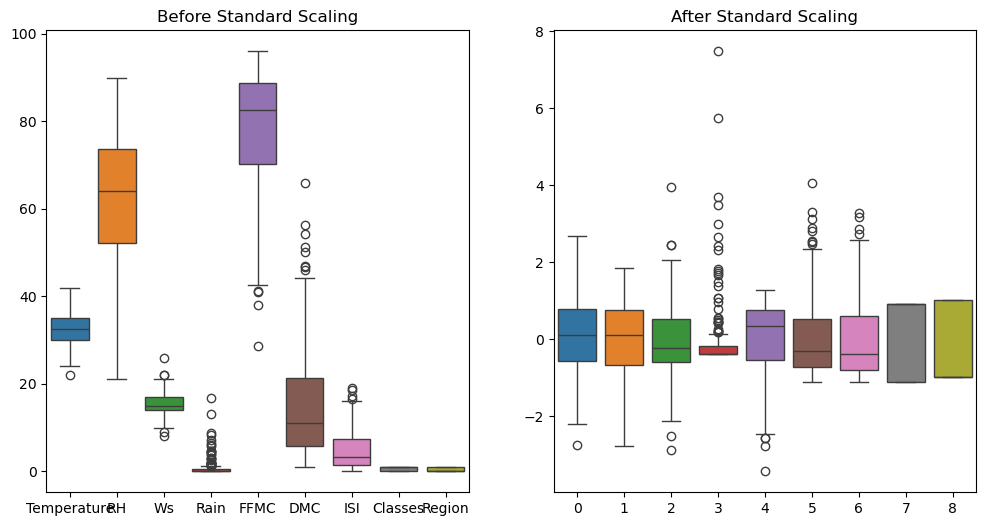

In [15]:
## Box plots to understand standard scaling effect
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('Before Standard Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('After Standard Scaling')
plt.show()

Mean Absolute error 0.5468236465249995
R2 Score 0.9847657384266951


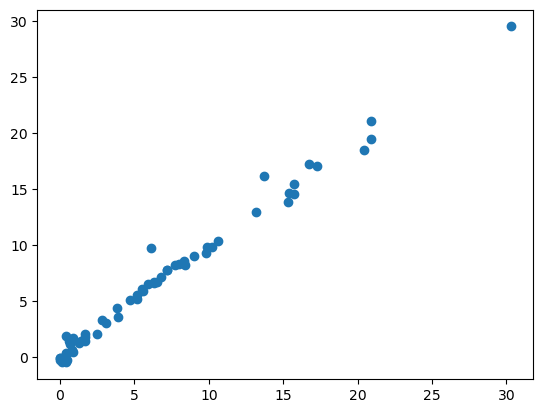

In [16]:
## Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print('Mean Absolute error', mae)
print('R2 Score', r2)
# plot the scatter graph for this 
plt.scatter(y_test, y_pred)
plt.show()

Mean Absolute error 1.1331759949144087
R2 Score 0.9492020263112388


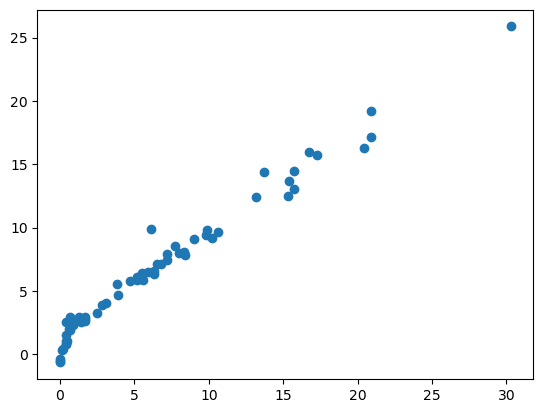

In [17]:
# Lasso Regression
from sklearn.linear_model import Lasso
ls = Lasso()
ls.fit(X_train_scaled, y_train)
y_pred = ls.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print('Mean Absolute error', mae)
print('R2 Score', r2)
# plot the scatter graph for this 
plt.scatter(y_test, y_pred)
plt.show()

Mean Absolute error 0.6199701158263433
R2 Score 0.9820946715928275


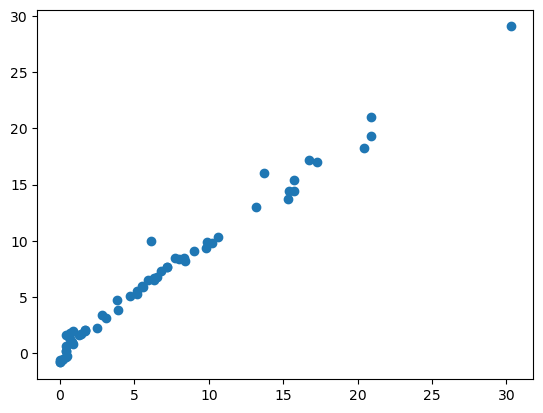

In [18]:
from sklearn.linear_model import LassoCV
lcv = LassoCV()
lcv.fit(X_train_scaled, y_train)
y_pred = lcv.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print('Mean Absolute error', mae)
print('R2 Score', r2)
# plot the scatter graph for this 
plt.scatter(y_test, y_pred)
plt.show()

Mean Absolute error 0.5642305340105677
R2 Score 0.9842993364555515


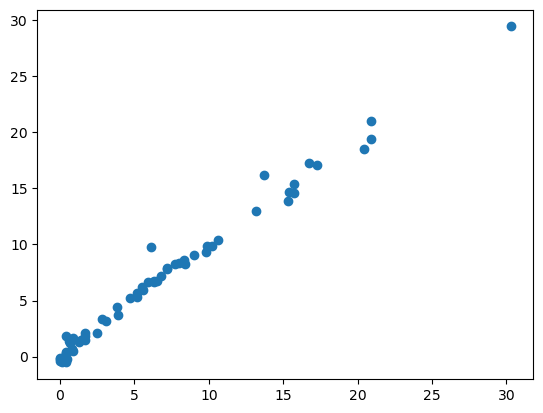

In [19]:
# Ridge Regression
from sklearn.linear_model import Ridge
rd = Ridge()
rd.fit(X_train_scaled, y_train)
y_pred = rd.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print('Mean Absolute error', mae)
print('R2 Score', r2)
# plot the scatter graph for this 
plt.scatter(y_test, y_pred)
plt.show()

Mean Absolute error 0.5642305340099703
R2 Score 0.9842993364555502


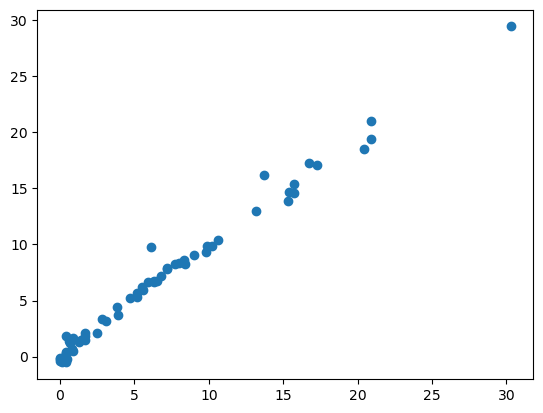

In [20]:
from sklearn.linear_model import RidgeCV
rcv = RidgeCV()
rcv.fit(X_train_scaled, y_train)
y_pred = rcv.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print('Mean Absolute error', mae)
print('R2 Score', r2)
# plot the scatter graph for this 
plt.scatter(y_test, y_pred)
plt.show()

Mean Absolute error 1.8822353634896005
R2 Score 0.8753460589519703


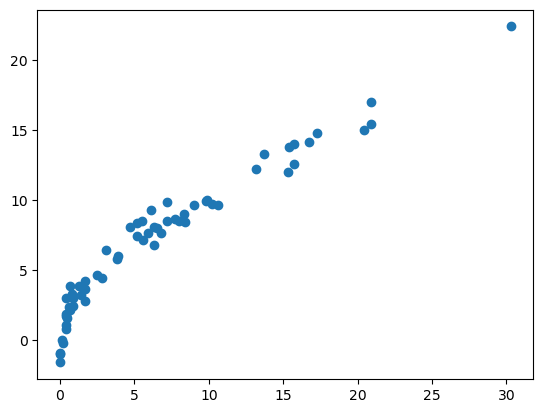

In [21]:
## Elasticnet Regression
from sklearn.linear_model import ElasticNet
en = ElasticNet()
en.fit(X_train_scaled, y_train)
y_pred = en.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print('Mean Absolute error', mae)
print('R2 Score', r2)
# plot the scatter graph for this 
plt.scatter(y_test, y_pred)
plt.show()

Mean Absolute error 0.6575946731430896
R2 Score 0.9814217587854942


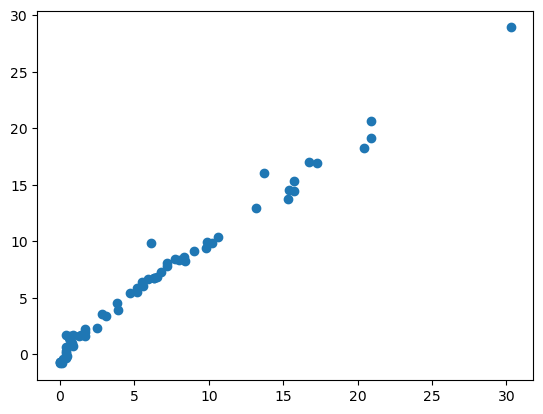

In [22]:
from sklearn.linear_model import ElasticNetCV
elcv = ElasticNetCV()
elcv.fit(X_train_scaled, y_train)
y_pred = elcv.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print('Mean Absolute error', mae)
print('R2 Score', r2)
# plot the scatter graph for this 
plt.scatter(y_test, y_pred)
plt.show()

In [23]:
## Pickle the model
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(rd,open('rd.pkl','wb'))